Assignment 1: Classifying movie reviews: a binary classification

**Tanmoy Kumar**

Increase hideen layers from 2 to 3. 

Load the dataset from Karas

In [11]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Max number of Most frequent word


In [12]:
max([max(sequence) for sequence in train_data])

9999

In [13]:

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

After transformation how the data loooks 

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorizing the labels

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Building networkwith three layers

In [16]:

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Model Compilation 

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

Validating our approach

In [20]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.6018 - binary_accuracy: 0.7009 - val_loss: 0.3857 - val_binary_accuracy: 0.8710
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3182 - binary_accuracy: 0.9002 - val_loss: 0.3014 - val_binary_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2317 - binary_accuracy: 0.9239 - val_loss: 0.2761 - val_binary_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1713 - binary_accuracy: 0.9457 - val_loss: 0.2750 - val_binary_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1323 - binary_accuracy: 0.9594 - val_loss: 0.3076 - val_binary_accuracy: 0.8799
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1156 - binary_accuracy: 0.9628 - val_loss: 0.3021 - val_binary_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - los

We can see that with the increase of hidden layers from 2 to 3 let small decrease in test and validation loss but the accouracy remain almost same. Having more hidden units (a higher-dimensional representation space) allows your network to learn more complex representations, but it makes the network more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).

In [24]:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

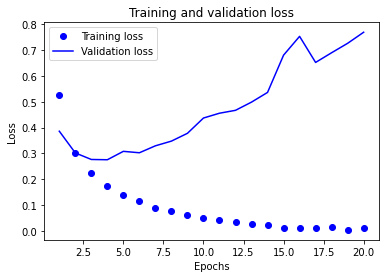

In [25]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

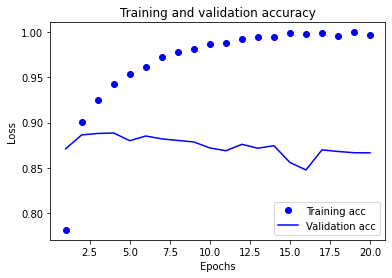

In [26]:
plt.clf()   # clear figure
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

From the Matplot graph we can see that training loss decreases with every epoch and the training accuracy increases with every epoch. But the validation loss and accuracy has the peak value at 3 epoch. So, we might take a call to stop after 3 epoch. 

Train a new Network layers with more hidden units units: 32

In [33]:

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 3s 44ms/step - loss: 0.5237 - accuracy: 0.7502
Epoch 2/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2665 - accuracy: 0.9117
Epoch 3/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2020 - accuracy: 0.9322
Epoch 4/20
49/49 [==============================] - 2s 44ms/step - loss: 0.1700 - accuracy: 0.9407
Epoch 5/20
49/49 [==============================] - 3s 69ms/step - loss: 0.1451 - accuracy: 0.9537
Epoch 6/20
49/49 [==============================] - 4s 73ms/step - loss: 0.1277 - accuracy: 0.9586
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1145 - accuracy: 0.9637
Epoch 8/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1075 - accuracy: 0.9660
Epoch 9/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0962 - accuracy: 0.9700
Epoch 10/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0872 - accuracy: 0.9718
Epoch 11/

In [34]:
results

[0.626705527305603, 0.8507199883460999]

generate predictions 

In [35]:

model.predict(x_test)

array([[0.03724787],
       [0.9999995 ],
       [0.87947476],
       ...,
       [0.09587327],
       [0.01113942],
       [0.8800137 ]], dtype=float32)

In [36]:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

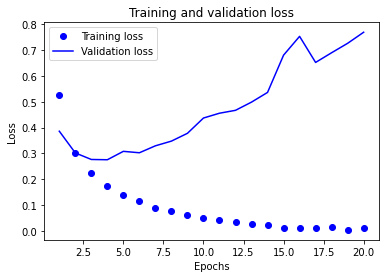

In [38]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

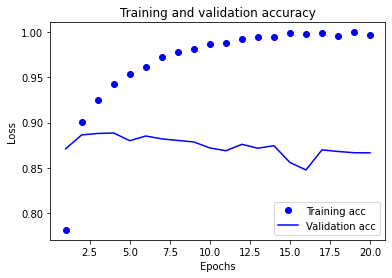

In [39]:
plt.clf()   # clear figure
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Train a new Network using the mse loss function instead of binary_crossentropy and tanh activation

In [40]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.1743 - accuracy: 0.7620
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.0830 - accuracy: 0.9127
Epoch 3/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0609 - accuracy: 0.9364
Epoch 4/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0510 - accuracy: 0.9442
Epoch 5/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0411 - accuracy: 0.9563
Epoch 6/20
49/49 [==============================] - 1s 28ms/step - loss: 0.0368 - accuracy: 0.9605
Epoch 7/20
49/49 [==============================] - 1s 28ms/step - loss: 0.0312 - accuracy: 0.9685
Epoch 8/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0274 - accuracy: 0.9727
Epoch 9/20
49/49 [==============================] - 1s 28ms/step - loss: 0.0246 - accuracy: 0.9761
Epoch 10/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0210 - accuracy: 0.9802
Epoch 11/

In [41]:
model.predict(x_test)

array([[0.009498  ],
       [1.        ],
       [0.9600905 ],
       ...,
       [0.32420635],
       [0.00730839],
       [0.91513765]], dtype=float32)

In [42]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

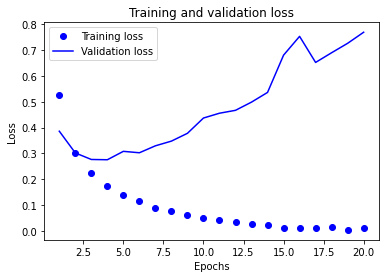

In [43]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

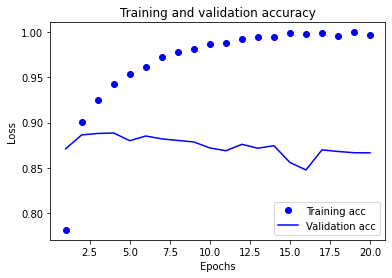

In [45]:
plt.clf()   # clear figure
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()